### 이름: 강동근

# 필요한 셀은 추가해서 작성하시면 됩니다.
###### https://github.com/vuski/admdongkor/blob/master/ver20220401/HangJeongDong_ver20220401.geojson 파일 다운로드 사용

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. 202206_202206_주민등록인구및세대현황_월간.xlsx를 가지고 와서 데이터 프레임으로 작성합니다.

In [2]:
import pandas as pd
import matplotlib as mpl

In [3]:
df = pd.read_excel('202206_202206_주민등록인구및세대현황_월간.xlsx',header=2)
df.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1100000000,서울특별시,"9,494,807","4,464,840",2.13,"4,605,655","4,889,152",0.94
1,1111000000,서울특별시 종로구,"143,624","73,728",1.95,"69,513","74,111",0.94
2,1111051500,서울특별시 종로구 청운효자동,"11,803","5,210",2.27,"5,430","6,373",0.85
3,1111053000,서울특별시 종로구 사직동,"9,310","4,674",1.99,"4,154","5,156",0.81
4,1111054000,서울특별시 종로구 삼청동,"2,386","1,193",2.00,"1,130","1,256",0.90


### 2. 인구정보 데이터 프레임의 컬럼명을 행정기관코드, 행정구역, 총인구수, 세대수, 세대당인구, 남자, 여자, 남녀비율 로 변경하세요

In [4]:
df.columns

Index(['행정기관코드', '행정기관', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율'], dtype='object')

In [5]:
df.columns = ['행정기관코드','행정구역','총인구수','세대수','세대당인구','남자','여자','남자비율']
df

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,남자비율
0,1100000000,서울특별시,"9,494,807","4,464,840",2.13,"4,605,655","4,889,152",0.94
1,1111000000,서울특별시 종로구,"143,624","73,728",1.95,"69,513","74,111",0.94
2,1111051500,서울특별시 종로구 청운효자동,"11,803","5,210",2.27,"5,430","6,373",0.85
3,1111053000,서울특별시 종로구 사직동,"9,310","4,674",1.99,"4,154","5,156",0.81
4,1111054000,서울특별시 종로구 삼청동,"2,386","1,193",2.00,"1,130","1,256",0.90
...,...,...,...,...,...,...,...,...
3860,5013058000,제주특별자치도 서귀포시 서홍동,"11,254","4,644",2.42,"5,556","5,698",0.98
3861,5013059000,제주특별자치도 서귀포시 대륜동,"15,411","6,923",2.23,"7,802","7,609",1.03
3862,5013060000,제주특별자치도 서귀포시 대천동,"13,802","6,460",2.14,"6,980","6,822",1.02
3863,5013061000,제주특별자치도 서귀포시 중문동,"12,217","5,903",2.07,"6,197","6,020",1.03


In [6]:
df.head(1)

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,남자비율
0,1100000000,서울특별시,"9,494,807","4,464,840",2.13,"4,605,655","4,889,152",0.94


### 3. 남녀비율 컬럼을 제거합니다.

In [7]:
df.drop(columns=['남자비율'],inplace=True)
df

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자
0,1100000000,서울특별시,"9,494,807","4,464,840",2.13,"4,605,655","4,889,152"
1,1111000000,서울특별시 종로구,"143,624","73,728",1.95,"69,513","74,111"
2,1111051500,서울특별시 종로구 청운효자동,"11,803","5,210",2.27,"5,430","6,373"
3,1111053000,서울특별시 종로구 사직동,"9,310","4,674",1.99,"4,154","5,156"
4,1111054000,서울특별시 종로구 삼청동,"2,386","1,193",2.00,"1,130","1,256"
...,...,...,...,...,...,...,...
3860,5013058000,제주특별자치도 서귀포시 서홍동,"11,254","4,644",2.42,"5,556","5,698"
3861,5013059000,제주특별자치도 서귀포시 대륜동,"15,411","6,923",2.23,"7,802","7,609"
3862,5013060000,제주특별자치도 서귀포시 대천동,"13,802","6,460",2.14,"6,980","6,822"
3863,5013061000,제주특별자치도 서귀포시 중문동,"12,217","5,903",2.07,"6,197","6,020"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정기관코드  3865 non-null   int64  
 1   행정구역    3865 non-null   object 
 2   총인구수    3865 non-null   object 
 3   세대수     3865 non-null   object 
 4   세대당인구   3865 non-null   float64
 5   남자      3865 non-null   object 
 6   여자      3865 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 211.5+ KB


### 4. 행정구역 컬럼의 ‘(’ ‘)’를 제거하고 시,구,동 컬럼을 만들어 분리해 넣고 부산지역의 값만 가지고 와서 인덱스를 새로 부여합니다.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정기관코드  3865 non-null   int64  
 1   행정구역    3865 non-null   object 
 2   총인구수    3865 non-null   object 
 3   세대수     3865 non-null   object 
 4   세대당인구   3865 non-null   float64
 5   남자      3865 non-null   object 
 6   여자      3865 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 211.5+ KB


In [10]:
# splited = df['행정구역'].str.split(' ',expand=True)
# splited.drop(columns=[3],inplace=True)
# splited.head()

df.행정구역 = df.행정구역.str.split('(').str.get(0)

In [11]:
df['시'] = df['행정구역'].str.split().str.get(0)
df['구'] = df['행정구역'].str.split().str.get(1)
df['동'] = df['행정구역'].str.split().str.get(2)

# splited.columns = ['시','구','동']
# splited.head()

In [12]:
df = df[df['시'] == '부산광역시']
df

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
452,2600000000,부산광역시,"3,336,737","1,556,938",2.14,"1,630,944","1,705,793",부산광역시,NaN,NaN
453,2611000000,부산광역시 중구,"40,455","24,304",1.66,"19,695","20,760",부산광역시,중구,NaN
454,2611051000,부산광역시 중구 중앙동,"3,174","2,468",1.29,"1,500","1,674",부산광역시,중구,중앙동
455,2611052000,부산광역시 중구 동광동,"2,593","1,696",1.53,"1,329","1,264",부산광역시,중구,동광동
456,2611053000,부산광역시 중구 대청동,"6,182","3,545",1.74,"2,892","3,290",부산광역시,중구,대청동
...,...,...,...,...,...,...,...,...,...,...
669,2671025000,부산광역시 기장군 기장읍,"52,218","25,672",2.03,"25,433","26,785",부산광역시,기장군,기장읍
670,2671025300,부산광역시 기장군 장안읍,"8,457","4,708",1.80,"4,580","3,877",부산광역시,기장군,장안읍
671,2671025600,부산광역시 기장군 정관읍,"81,429","32,032",2.54,"40,289","41,140",부산광역시,기장군,정관읍
672,2671025900,부산광역시 기장군 일광읍,"27,610","11,648",2.37,"13,641","13,969",부산광역시,기장군,일광읍


In [13]:
df.reset_index(inplace=True,drop=True)
df.head()

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
0,2600000000,부산광역시,"3,336,737","1,556,938",2.14,"1,630,944","1,705,793",부산광역시,NaN,NaN
1,2611000000,부산광역시 중구,"40,455","24,304",1.66,"19,695","20,760",부산광역시,중구,NaN
2,2611051000,부산광역시 중구 중앙동,"3,174","2,468",1.29,"1,500","1,674",부산광역시,중구,중앙동
3,2611052000,부산광역시 중구 동광동,"2,593","1,696",1.53,"1,329","1,264",부산광역시,중구,동광동
4,2611053000,부산광역시 중구 대청동,"6,182","3,545",1.74,"2,892","3,290",부산광역시,중구,대청동


### 5. 총인구수, 남자, 여자 컬럼의 데이타 타입을 정수형으로 변경합니다.

In [14]:
df['총인구수'] = df['총인구수'].str.replace(',','').astype(int)
df['남자'] = df['남자'].str.replace(',', '').astype(int)
df['여자'] = df['여자'].str.replace(',', '').astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정기관코드  222 non-null    int64  
 1   행정구역    222 non-null    object 
 2   총인구수    222 non-null    int32  
 3   세대수     222 non-null    object 
 4   세대당인구   222 non-null    float64
 5   남자      222 non-null    int32  
 6   여자      222 non-null    int32  
 7   시       222 non-null    object 
 8   구       221 non-null    object 
 9   동       205 non-null    object 
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 14.9+ KB


### 6. 동별로 부산 인구를 차트로 표시합니다.(인구순 5개동만)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# df['총인구수'].rank(method='max').head(5)

In [18]:
df.dropna(inplace=True)
df.head(3)

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
2,2611051000,부산광역시 중구 중앙동,3174,"2,468",1.29,1500,1674,부산광역시,중구,중앙동
3,2611052000,부산광역시 중구 동광동,2593,"1,696",1.53,1329,1264,부산광역시,중구,동광동
4,2611053000,부산광역시 중구 대청동,6182,"3,545",1.74,2892,3290,부산광역시,중구,대청동


In [19]:
data_1 = df.groupby('동')['총인구수'].sum().sort_values(ascending=False).head()
data_1

동
정관읍      81429
명지1동     53827
기장읍      52218
용호제1동    43721
화명제1동    40988
Name: 총인구수, dtype: int32

In [20]:
data_1 = data_1.reset_index()

<AxesSubplot:xlabel='동', ylabel='총인구수'>

findfont: Font family ['malgunsl'] not found. Falling back to DejaVu Sans.


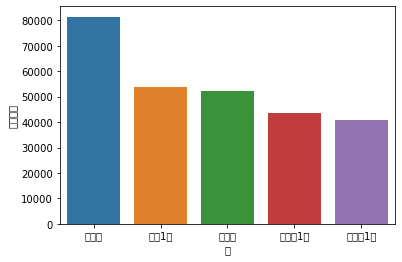

In [21]:
sns.barplot(data = data_1, x = '동',y = '총인구수')

### 7. 동별 남,여 인구를 차트로 표시합니다.(인구순 5개동만)

<AxesSubplot:xlabel='동', ylabel='여자'>

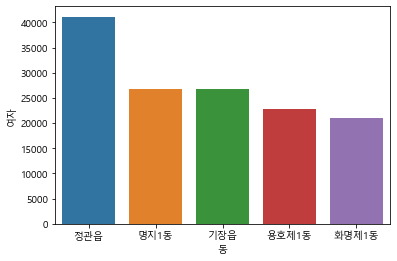

In [22]:
plt.rcParams['font.family']='Malgun Gothic'

# -기호가 깨질때
mpl.rcParams['axes.unicode_minus'] = False

data_w = df.groupby('동')['여자'].sum().sort_values(ascending=False).head()
data_w = data_w.reset_index()
sns.barplot(data=data_w,x='동',y='여자')

<AxesSubplot:xlabel='동', ylabel='남자'>

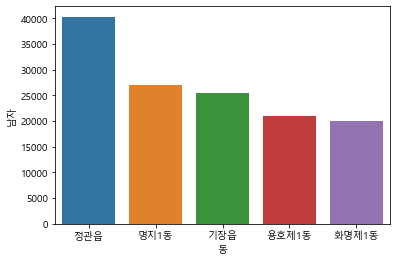

In [23]:
data_w = df.groupby('동')['남자'].sum().sort_values(ascending=False).head()
data_w = data_w.reset_index()
sns.barplot(data=data_w,x='동',y='남자')

### 8. Choropleth, geojson 등을 이용하여 동별 인구수를 색상별로 지도에 나타내시오

In [24]:
import json

In [25]:
rfile = open('HangJeongDong_ver20220401.geojson','r',encoding='utf-8').read()
#type(rfile)
jdata = json.loads(rfile)

jdata_bs = {"type":"FeatureCollection"}
jdata_pick = []
jdata_dong = []

for idx in jdata['features']:
    if idx['properties']['sidonm'] == '부산광역시':
        dong = idx['properties']['adm_nm'].split()[-1].strip()
        idx['id'] = dong
        jdata_dong.append(dong)
        jdata_pick.append(idx)
jdata['features'] = jdata_pick
f = open('busan.json','w')
json.dump(jdata,f)

In [26]:
jdata

{'type': 'FeatureCollection',
 'name': 'hang0401',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 425,
    'adm_nm': '부산광역시 중구 중앙동',
    'adm_cd': '2101051',
    'adm_cd2': '2611051000',
    'sgg': '26110',
    'sido': '26',
    'sidonm': '부산광역시',
    'temp': '중구 중앙동',
    'sggnm': '중구',
    'adm_cd8': '21010510'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[129.04001607594367, 35.111424681629],
       [129.0427298111509, 35.110722158835344],
       [129.042347191582, 35.11034344765853],
       [129.0423152220015, 35.11029796763163],
       [129.041990699126, 35.10982871044188],
       [129.0414304709214, 35.109010295030885],
       [129.04088010913745, 35.10811134155702],
       [129.0445525636584, 35.10580584261088],
       [129.04373774886275, 35.10492439441351],
       [129.04036624750276, 35.10703056658817],
       [129.0398182034819, 35.10584181288945],
       

In [27]:
import folium
map = folium.Map([35.230194,129.074721],zoom_start=10)
rfile = open('busan.json').read()
jdata = json.loads(rfile)
folium.Choropleth(geo_data = jdata,
                  data = df,
                  columns = ['동','총인구수'],
                  key_on = 'feature.id',
                  legend_name = '부산인구').add_to(map)
map

JSONDecodeError: Expecting value: line 1 column 597466 (char 597465)